# **Projec Name-Health Insurance Cross Sell Prediction.**

**Project type - Exploratory Data Analysis(EDA)and Machine learning.**

**Contribution - Individual.**

**Team member1 - Abhishek Gupta.**

<font size="+3" color='#053c96'><b> Problem Statement</b></font>

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

 <font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# ***Let's Begin !***

# **Know Your Data**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# **Mounted google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset loading**

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Health Insurance Cross Sell Prediction/HEALTH INSURANCE CROSS SELL PREDICTION.csv")

# **Datast First View**

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# **Ok, so we can see our dataset has 381109 data and 12 columns. Lets try to understand about the columns we've got here.**

*   **Id:-**  A unique id for customer.
*   **Gender:-**  Male\Female.
*   **Age-:**    Age of customer.
*  **Driving_License:-**  Customer has DL or not.
*  **Region_Code:-**   Unique code for the  region of the Customer.
* **Previously_Insured:-**  Customer already has vehicle insurance or not
*  **Vehicle_Age:-** Age of the Vehicle
*   **Vehicle_Damage:-** Past Damage present or not.
*  **Annual_Premium:-**  The Amount customer needs to pay.
*  **Policy_Sales_Channel:-** Anonymized Code for the channle of outreaching to the customer i.e Different Agent, over mail, over phone In person etc.
*  **Vintage:-** Number of days, Customer has been associated with the company.
*   **Response:-** Customer is Intrested or not







# **Data Exploration and Data Cleaning**

# **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

In [ ]:
#The head() funtion is used to show top 5 data in dataset.
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
columns_to_convert = ['id','Age', 'Region_Code', 'Annual_Premium', 'Vintage', 'Driving_License', 'Response',
                      'Policy_Sales_Channel','Previously_Insured']

df[columns_to_convert] = df[columns_to_convert].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int32 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int32 
 3   Driving_License       381109 non-null  int32 
 4   Region_Code           381109 non-null  int32 
 5   Previously_Insured    381109 non-null  int32 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int32 
 9   Policy_Sales_Channel  381109 non-null  int32 
 10  Vintage               381109 non-null  int32 
 11  Response              381109 non-null  int32 
dtypes: int32(9), object(3)
memory usage: 21.8+ MB


#**Check for missing values**

In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int32 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int32 
 3   Driving_License       381109 non-null  int32 
 4   Region_Code           381109 non-null  int32 
 5   Previously_Insured    381109 non-null  int32 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int32 
 9   Policy_Sales_Channel  381109 non-null  int32 
 10  Vintage               381109 non-null  int32 
 11  Response              381109 non-null  int32 
dtypes: int32(9), object(3)
memory usage: 21.8+ MB


In [ ]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# **Age Distribution of Customers**

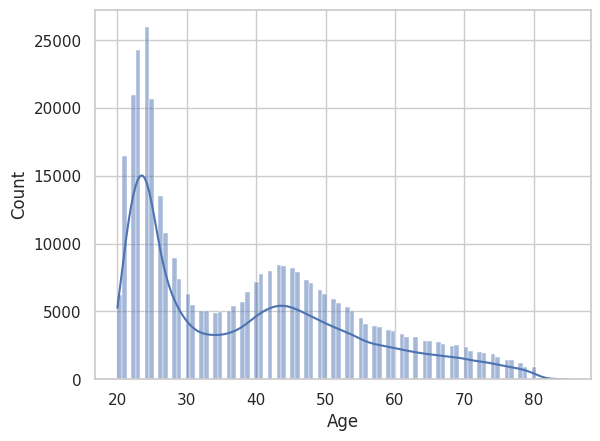

In [ ]:
sns.histplot(df['Age'], kde=True)  # kde=True adds a kernel density estimate
plt.show()

<ipython-input-114-6d80512bec80>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'Age', data = df,palette='Accent')


<Axes: ylabel='Age'>

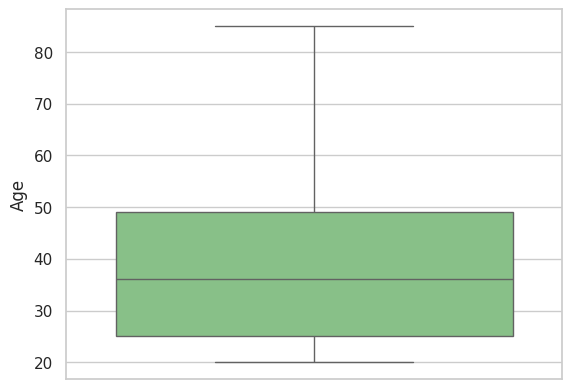

In [ ]:
sns.boxplot(y = 'Age', data = df,palette='Accent')

# **Age Vs Annual premium**

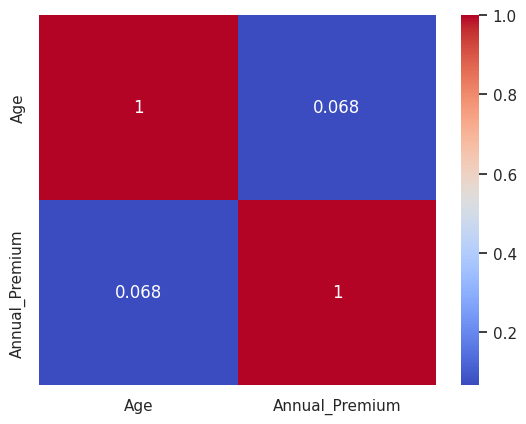

In [ ]:
correlation_matrix = df[['Age', 'Annual_Premium']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Gender vs Response**

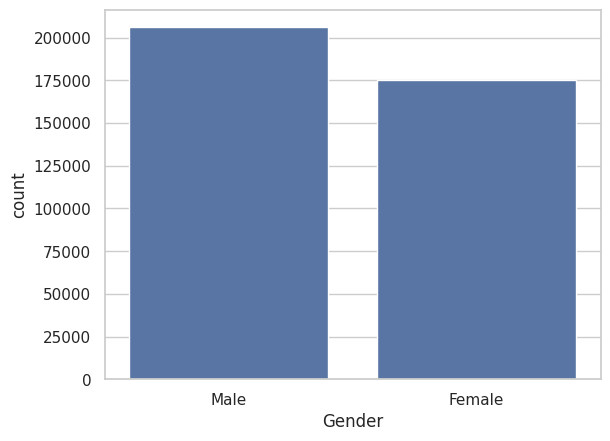

In [ ]:
sns.countplot(data=df, x='Gender')
plt.show()

# **Driving license by Gender**

In [ ]:
df1=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

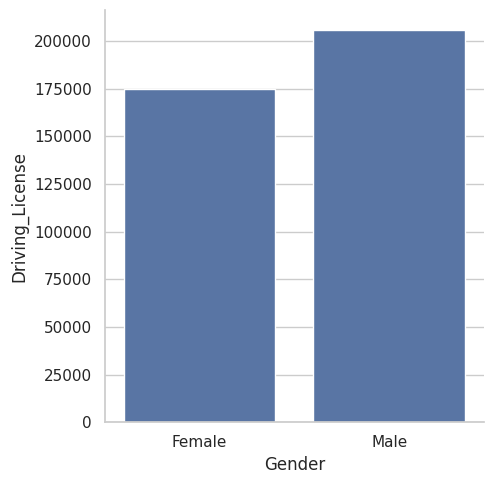

In [ ]:
sns.catplot(x="Gender", y="Driving_License",
                data=df1, kind="bar");

# **Vehicle Age**

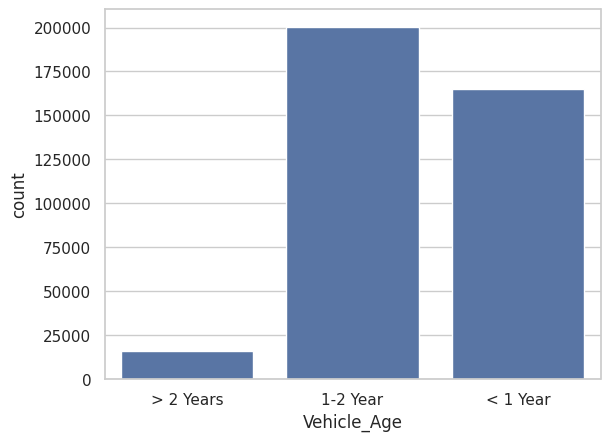

In [ ]:
sns.countplot(data=df, x='Vehicle_Age')
plt.show()

# **Data Preprocessing**

In [ ]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Driving_License'].unique()

array([1, 0], dtype=int32)

In [ ]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Driving_License'] = label_encoder.fit_transform(df['Driving_License'])
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,2,1,40454,26,217,1
1,1,76,1,3,0,0,0,33536,26,183,0
2,1,47,1,28,0,2,1,38294,26,27,1
3,1,21,1,11,1,1,0,28619,152,203,0
4,0,29,1,41,1,1,0,27496,152,39,0


# ***Check Response class is Balanced or not***

0    334399
1     46710
Name: Response, dtype: int64

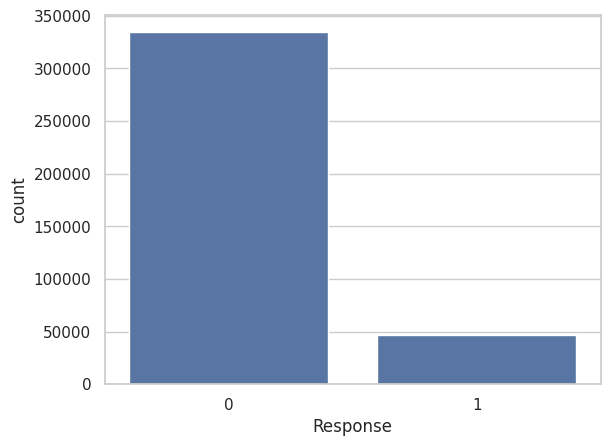

In [ ]:
sns.countplot(data=df, x='Response')
df['Response'].value_counts()

In [ ]:
from sklearn.utils import resample
# create two data frame of Majority and Minority class
df_majority = df[(df['Response']==0)]
df_minority = df[(df['Response']==1)]

#upsample minority class
df_minority_upsample = resample(df_minority,
                                 replace=True,        # sample with replacement
                                 n_samples= 334399,     # to match majority class
                                 random_state = 0)   #reproducible result

# combine majority class and unsample minorit class
df_unsample = pd.concat([df_minority_upsample , df_majority])

1    334399
0    334399
Name: Response, dtype: int64

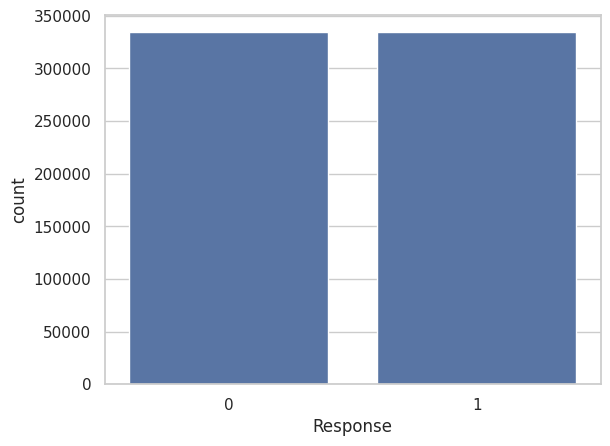

In [ ]:
sns.countplot(data=df_unsample, x='Response')
df_unsample['Response'].value_counts()

# **Checking outlier in dataset.**

<Axes: xlabel='Annual_Premium'>

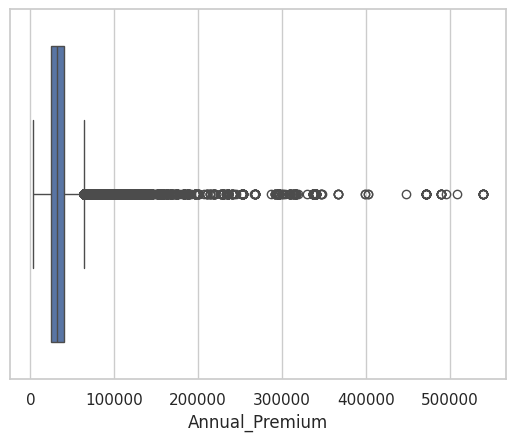

In [ ]:
sns.boxplot(x=df_unsample['Annual_Premium'])

<Axes: xlabel='Age'>

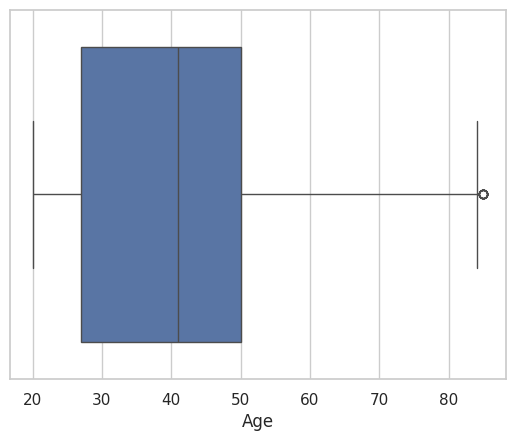

In [ ]:
sns.boxplot(x=df_unsample['Age'])

<Axes: xlabel='Policy_Sales_Channel'>

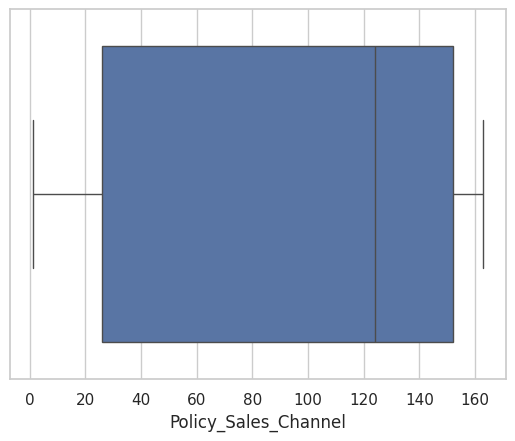

In [ ]:
sns.boxplot(x=df_unsample['Policy_Sales_Channel'])

<Axes: xlabel='Vintage'>

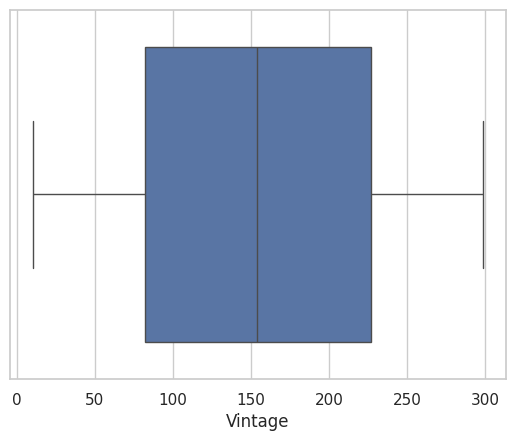

In [ ]:
sns.boxplot(x=df_unsample['Vintage'])

In [ ]:
# Remove outlier using Z-score method
import scipy.stats as stats
z = np.abs(stats.zscore(df_unsample))
data_clean = df_unsample[(z<3).all(axis = 1)]

In [ ]:
data_clean.shape

(664106, 11)

<Axes: >

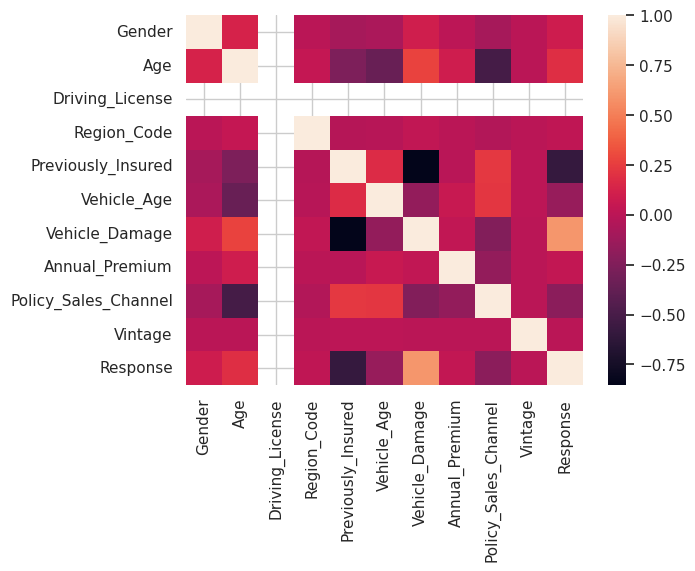

In [ ]:
sns.heatmap(data_clean.corr())

In [ ]:
#Remove Driving_License Attribute
data_clean.drop('Driving_License', axis=1 , inplace=True)

<ipython-input-138-cce74c201afa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop('Driving_License', axis=1 , inplace=True)


In [ ]:
data_clean.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
22008,1,43,13,0,0,1,26950,26,266,1
354307,0,60,24,0,0,1,2630,124,286,1
346468,0,23,28,0,1,1,44214,152,258,1
373994,1,43,28,0,0,1,35139,26,11,1
172967,1,38,28,0,0,1,34115,26,45,1


<font size="+3" color='#053c96'><b>Machine learning Model Building</b></font>

In [ ]:
X = data_clean.drop('Response' , axis=1)
y = data_clean['Response']

#Test size get 20% and Train size get 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 0)

<font size="+2" color='#053c96'><b>Decision Tree Clasifier</b></font>

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score , classification_report
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:',accuracy)
print (classification_report(y_test, y_pred))

Accuracy Score: 0.9428182078270166
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     66537
           1       0.90      1.00      0.95     66285

    accuracy                           0.94    132822
   macro avg       0.95      0.94      0.94    132822
weighted avg       0.95      0.94      0.94    132822



<font size="+2" color='#053c96'><b>Random Forest Clasifier</b></font>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:',accuracy)
print (classification_report(y_test, y_pred))

Accuracy Score: 0.9489015373959133
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     66537
           1       0.91      1.00      0.95     66285

    accuracy                           0.95    132822
   macro avg       0.95      0.95      0.95    132822
weighted avg       0.95      0.95      0.95    132822




<font size="+2" color='#053c96'><b>Logistic Regresion</b></font>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:',accuracy)
print (classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7211154778575838
              precision    recall  f1-score   support

           0       0.78      0.62      0.69     66537
           1       0.68      0.82      0.75     66285

    accuracy                           0.72    132822
   macro avg       0.73      0.72      0.72    132822
weighted avg       0.73      0.72      0.72    132822




<font size="+2" color='#053c96'><b>K Nearest Neighbours</b></font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:',accuracy)
print (classification_report(y_test, y_pred))

Accuracy Score: 0.8189381277198055
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     66537
           1       0.75      0.97      0.84     66285

    accuracy                           0.82    132822
   macro avg       0.85      0.82      0.82    132822
weighted avg       0.85      0.82      0.82    132822



<font size="+2" color='#053c96'><b>*Thank you!*</b></font>